<a href="https://colab.research.google.com/github/zahraakthh12/data-analytics/blob/main/Project_Akhir_Kelompok_5_Data_Analystic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Kelompok 5**
1. Hana Humaira
2. Nada Ulayya Rahman
3. Shella Sagita Theo
4. Zahra Khotimah

**link SQL:** https://console.cloud.google.com/bigquery?ws=!1m7!1m6!12m5!1m3!1sproyekakhir-dataanalystic!2sasia-southeast2!3se51071c8-fbd7-4ac5-9ecc-cc3c03ea05a5!2e1

**link slide:** https://www.canva.com/design/DAG8Ivvfr6Y/Q-UrGOQw5_aw90m7CH5NaA/edit?utm_content=DAG8Ivvfr6Y&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

# **Import Library yang Dibutuhkan**

In [ ]:
import pandas as pd
from google.cloud import bigquery
from google.colab import auth
from google.oauth2 import service_account
import seaborn as sns
import matplotlib.pyplot as plt

# **Connect in Google Colab x BigQuery**

In [ ]:
auth.authenticate_user()


In [ ]:
from google.cloud import bigquery

client = bigquery.Client(project="proyekakhir-dataanalystic")


# **BAB 1: Pemindaian Awal (Global Overview)**

## Tugas 1.1 (Profil Kesenjangan Ekonomi)

Hitung total negara dan rentang kekayaan (GDP Minimal dan Maksimal).

In [ ]:
q1_1 = """
SELECT
       COUNT(*) total_negara,
       MIN(gdpp) gdp_minimal,
       MAX(gdpp) gdp_maksimal
FROM `proyekakhir-dataanalystic.apl_project.country_data`;

"""
df_1_1 = client.query(q1_1).to_dataframe()
df_1_1

,total_negara,gdp_minimal,gdp_maksimal
0,167,231,105000


**Interpretasi:**

Terdapat 167 negara, dengan GDP minimal adalah negara Burundi sebesar 231, sedangkan GDP maksimal adalah negara Luxembourg sebesar 105000.

## Tugas 1.2 (Analisis Tingkat Fertilitas)

Identifikasi 5 negara dengan tingkat kesuburan tertinggi.

In [ ]:
q1_2 = """
SELECT country, total_fer
FROM `proyekakhir-dataanalystic.apl_project.country_data`
ORDER BY total_fer DESC
LIMIT 5
"""
df_1_2 = client.query(q1_2).to_dataframe()
print(df_1_2)

            country  total_fer
0             Niger       7.49
1              Chad       6.59
2              Mali       6.55
3  Congo, Dem. Rep.       6.54
4           Burundi       6.26


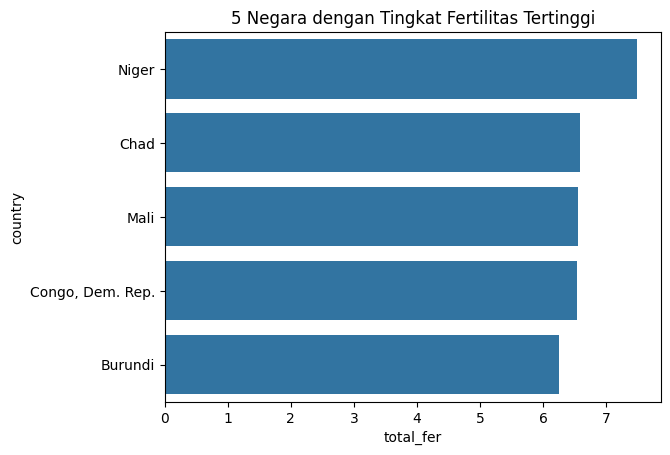

In [ ]:
sns.barplot(data=df_1_2, x="total_fer", y="country")
plt.title("5 Negara dengan Tingkat Fertilitas Tertinggi")
plt.show()

**Interpretasi:**

Niger memiliki angka kesuburan tertinggi dengan rata-rata 7 kelahiran dari setiap wanita berusia subur. Negara dengan tingat kesuburan tertinggi setelah Niger adalah Chad, Mali, Congo, Dem. Rep., dan Burundi dengan rata-rata 6 kelahiran dari setiap Wanita berusia subur.
Rentang angka kesuburan tertinggi adalah 7,49-6,26.

## Tugas 1.3 (Analisis Harapan Hidup)

Daftar 5 negara dengan angka harapan hidup terendah.

In [ ]:
q1_3 = """
SELECT country, life_expec
FROM `proyekakhir-dataanalystic.apl_project.country_data`
ORDER BY life_expec ASC
LIMIT 5
"""
df_1_3 = client.query(q1_3).to_dataframe()
print(df_1_3)

                    country  life_expec
0                     Haiti        32.1
1                   Lesotho        46.5
2  Central African Republic        47.5
3                    Zambia        52.0
4                    Malawi        53.1


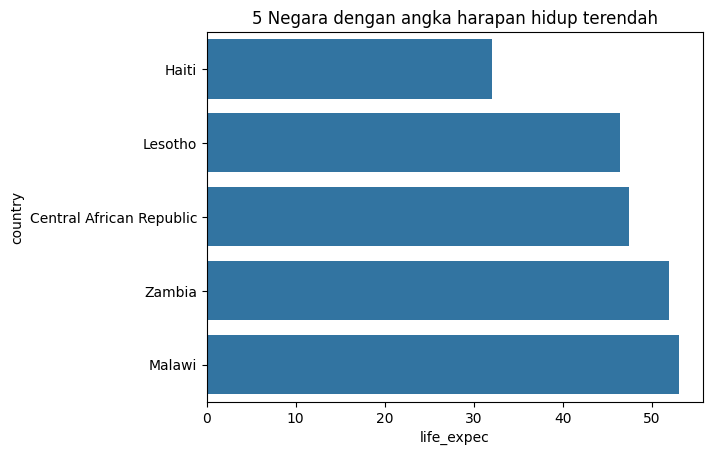

In [ ]:
sns.barplot(data=df_1_3, x="life_expec", y="country")
plt.title("5 Negara dengan angka harapan hidup terendah")
plt.show()

**Interpretasi:**

Haiti memiliki angka harapan hidup terendah dengan rata-rata 32,1 tahun. Negara dengan angka harapan hidup terendah setelah Haiti adalah Lesotho (46,5 tahun), Central African Republic (47,5 tahun), Zambia (52,0 tahun), dan Malawi (53,1 tahun).
Rentang angka harapan hidup terendah adalah 32,1 - 53,1 tahun.

## Tugas 1.4 (Identifkasi Inflasi Tinggi)

Cari 5 negara dengan tingkat inflasi tertinggi untuk mengukur stabilitas ekonomi.

In [ ]:
q1_4 = """
SELECT country, inflation
FROM `proyekakhir-dataanalystic.apl_project.country_data`
ORDER BY inflation DESC
LIMIT 5
"""
df_1_4 = client.query(q1_4).to_dataframe()
print(df_1_4)

             country  inflation
0            Nigeria      104.0
1          Venezuela       45.9
2           Mongolia       39.2
3        Timor-Leste       26.5
4  Equatorial Guinea       24.9


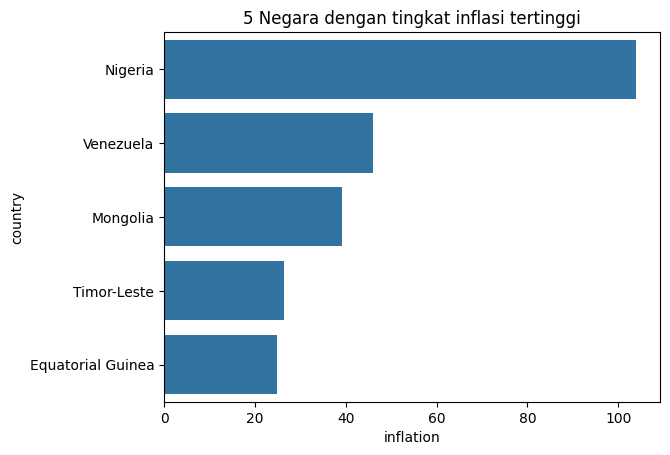

In [ ]:
sns.barplot(data=df_1_4, x="inflation", y="country")
plt.title("5 Negara dengan tingkat inflasi tertinggi")
plt.show()

**Interpretasi:**

Nigeria memiliki tingkat inflasi tertinggi dengan tingkat pertumbuhan nilai produksi negara (GDP) total mencapai 104,0 per tahun. Negara dengan angka inflasi tertinggi setelah Nigeria adalah Venezuela (45,9), Mongolia (39,2), Timor-Leste (26,5), dan Equatorial Guinea (24,9).
Rentang tingkat inflasi tertinggi adalah 104,0 - 24,9.

## Tugas 1.5 (Hubungan Pendapatan dan Kesehatan)

Bandingkan 5 negara dengan pendapatan tertinggi terhadap 5 negara dengan angka kematian anak terendah.

In [ ]:
q1_5 = """
WITH top_income AS (
    SELECT country, income, child_mort
    FROM `proyekakhir-dataanalystic.apl_project.country_data`
    WHERE income IS NOT NULL
    ORDER BY income DESC
    LIMIT 5
),

low_child_mort AS (
    SELECT country, income, child_mort
    FROM `proyekakhir-dataanalystic.apl_project.country_data`
    WHERE child_mort IS NOT NULL
    ORDER BY child_mort ASC
    LIMIT 5
)
SELECT country, income, child_mort,'Pendapatan Tertinggi' AS kategori
FROM top_income
UNION ALL
SELECT country, income, child_mort,'Kematian Anak Terendah' AS kategori
FROM low_child_mort
"""
df_1_5 = client.query(q1_5).to_dataframe()
print(df_1_5)

      country  income  child_mort                kategori
0       Qatar  125000         9.0    Pendapatan Tertinggi
1  Luxembourg   91700         2.8    Pendapatan Tertinggi
2      Brunei   80600        10.5    Pendapatan Tertinggi
3      Kuwait   75200        10.8    Pendapatan Tertinggi
4   Singapore   72100         2.8    Pendapatan Tertinggi
5     Iceland   38800         2.6  Kematian Anak Terendah
6   Singapore   72100         2.8  Kematian Anak Terendah
7  Luxembourg   91700         2.8  Kematian Anak Terendah
8      Sweden   42900         3.0  Kematian Anak Terendah
9     Finland   39800         3.0  Kematian Anak Terendah


/tmp/ipython-input-68142222.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


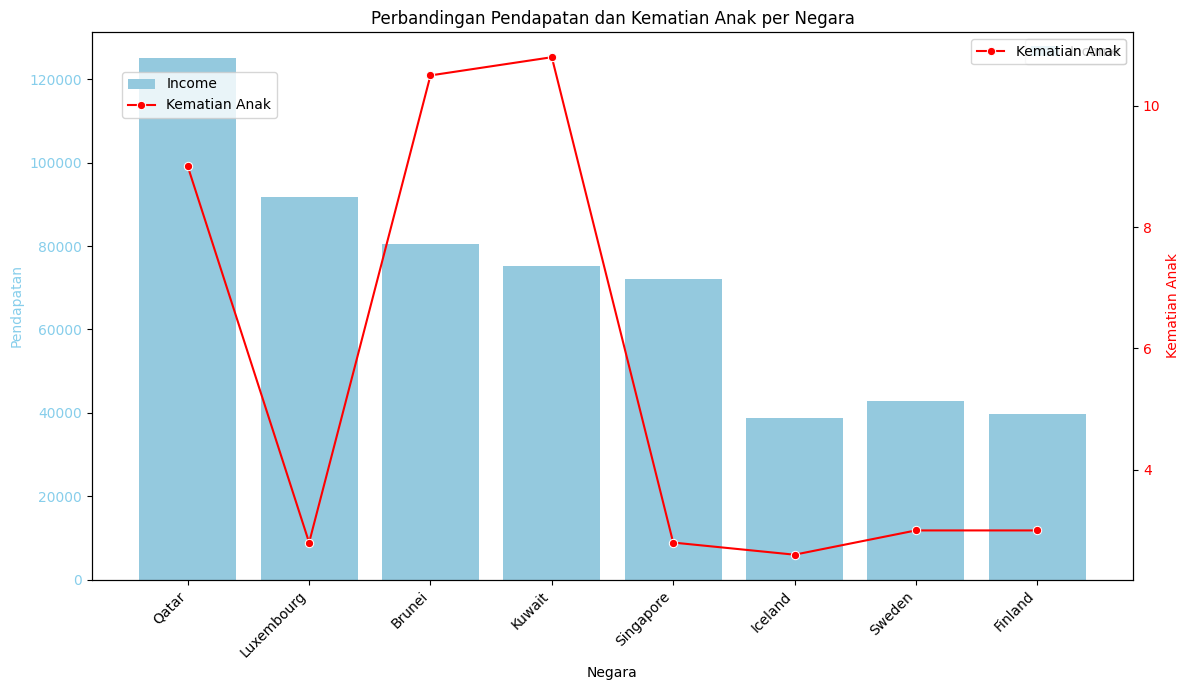

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 7))

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot income on the first y-axis
sns.barplot(x='country', y='income', data=df_1_5, ax=ax1, color='skyblue', label='Income')
ax1.set_ylabel('Pendapatan', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Plot child_mort on the second y-axis
sns.lineplot(x='country', y='child_mort', data=df_1_5, ax=ax2, color='red', marker='o', label='Kematian Anak')
ax2.set_ylabel('Kematian Anak', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set title and labels
plt.title('Perbandingan Pendapatan dan Kematian Anak per Negara')
ax1.set_xlabel('Negara')

# Add legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()

**Interpretasi**

Rentang angka pendapatan aktual per orang tertinggi adalah 125000 - 72100 dan rentang angka kematian anak terendah adalah 2,6-3,0.
Grafik di atas membuktikan bahwa pendapatan per orang yang tinggi tidak secara otomatis menjamin tingkat kematian anak yang paling rendah. Hal ini disebabkan banyak faktor lain yang mempengaruhi tingkat kematian anak, seperti akses dan kualitas layanan kesehatan, sanitasi, pendidikan ibu, serta stabilitas sosial. Tanpa sistem kesehatan yang efektif dan inklusif, peningkatan income tidak selalu berbanding lurus dengan perbaikan kesehatan anak.

# **Bab 2: Menyingkap Fakta Tersembunyi (Feature Engineering)**

## Tugas 2.1 (Konversi Anggaran Kesehatan ke USD)

Hitung pengeluaran kesehatan aktual per orang dalam mata uang USD. Rumus: (health / 100) * gdpp.

In [ ]:
q2_1 = """
SELECT country,
       health,
       gdpp,
       ROUND(((health/100)* gdpp),2) health_spending
FROM `proyekakhir-dataanalystic.apl_project.country_data`
ORDER BY health_spending
"""
df_2_1 = client.query(q2_1).to_dataframe()
df_2_1

,country,health,gdpp,health_spending
0,Eritrea,2.66,482,12.82
1,Madagascar,3.77,413,15.57
2,Central African Republic,3.98,446,17.75
3,Niger,5.16,348,17.96
4,Myanmar,1.97,988,19.46
...,...,...,...,...
162,Denmark,11.40,58000,6612.00
163,Luxembourg,7.77,105000,8158.50
164,Norway,9.48,87800,8323.44
165,Switzerland,11.50,74600,8579.00


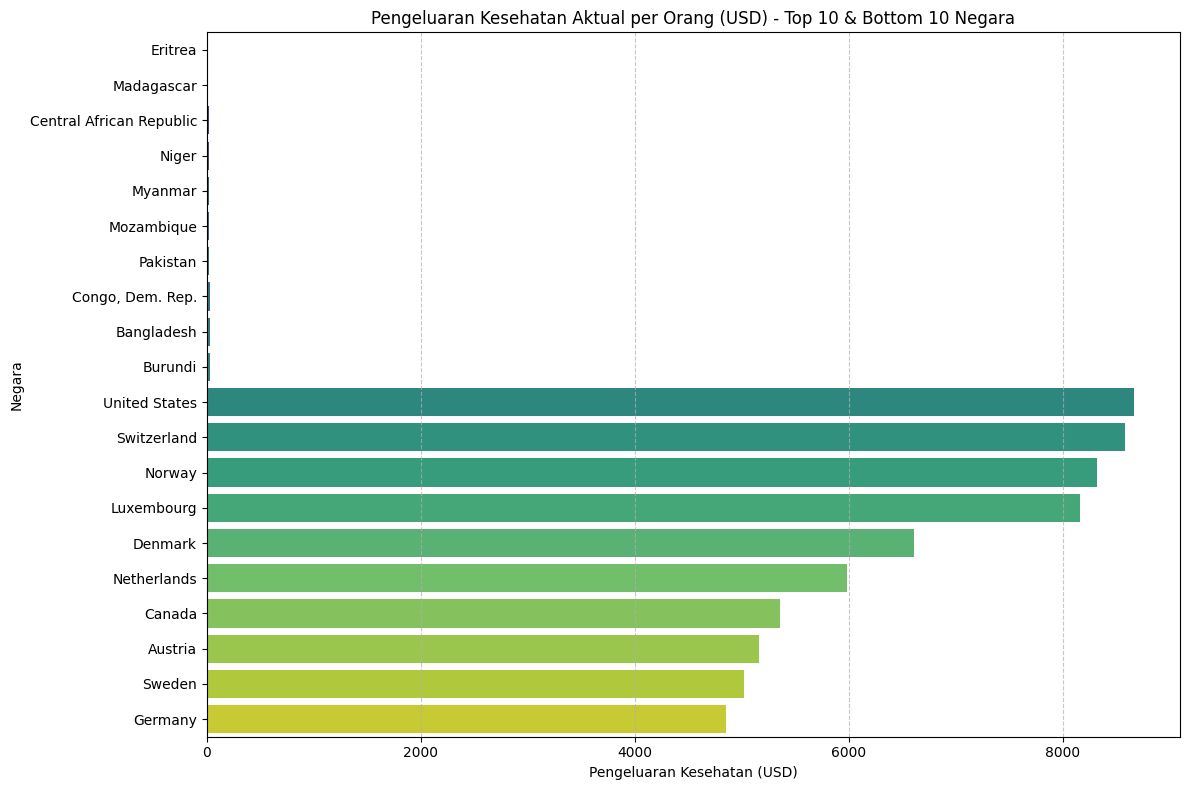

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 and bottom 10 countries by health_spending
top_10_health_spending = df_2_1.nlargest(10, 'health_spending')
bottom_10_health_spending = df_2_1.nsmallest(10, 'health_spending')

# Combine for visualization
combined_health_spending = pd.concat([bottom_10_health_spending, top_10_health_spending])

plt.figure(figsize=(12, 8))
sns.barplot(x='health_spending', y='country', hue='country', data=combined_health_spending, palette='viridis', legend=False)
plt.title('Pengeluaran Kesehatan Aktual per Orang (USD) - Top 10 & Bottom 10 Negara')
plt.xlabel('Pengeluaran Kesehatan (USD)')
plt.ylabel('Negara')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Interpretasi:**

Rentang pengeluaran kesehatan aktual per orang adalah 12,82 - 8663,6 dengan USA tertinggi dan Eritrea terendah.
Data menunjukkan bahwa pengeluaran kesehatan aktual per orang sangat dipengaruhi oleh tingkat GDP per kapita. Negara berpendapatan rendah hanya mampu membelanjakan belasan dolar per orang untuk kesehatan, sementara negara berpendapatan tinggi, meskipun mengalokasikan persentase GDP yang relatif serupa, dapat mengalokasikan ribuan dolar. Hal ini dapat menjelaskan kesenjangan besar dalam kualitas layanan kesehatan dan hasil kesehatan antarnegara.

## Tugas 2.2 (Analisis Neraca Perdagangan)


Hitung selisih ekspor dan impor dalam USD. Rumus: (exports - imports) * (gdpp / 100).

In [ ]:
q2_2 = """
SELECT country,
       exports,
       imports,
       ROUND(((exports-imports)*(gdpp/100)),2) trade_balance
FROM `proyekakhir-dataanalystic.apl_project.country_data`
ORDER BY trade_balance
"""
df_2_2 = client.query(q2_2).to_dataframe()
df_2_2

,country,exports,imports,trade_balance
0,Bahamas,35.0,43.7,-2436.00
1,Greece,22.1,30.7,-2313.40
2,Cyprus,50.2,57.5,-2248.40
3,Lebanon,35.8,60.2,-2161.84
4,St. Vincent and the Grenadines,26.9,57.1,-1881.46
...,...,...,...,...
162,Singapore,200.0,174.0,12116.00
163,Brunei,67.4,28.0,13908.20
164,Kuwait,66.7,30.4,13975.50
165,Qatar,62.3,23.8,27065.50


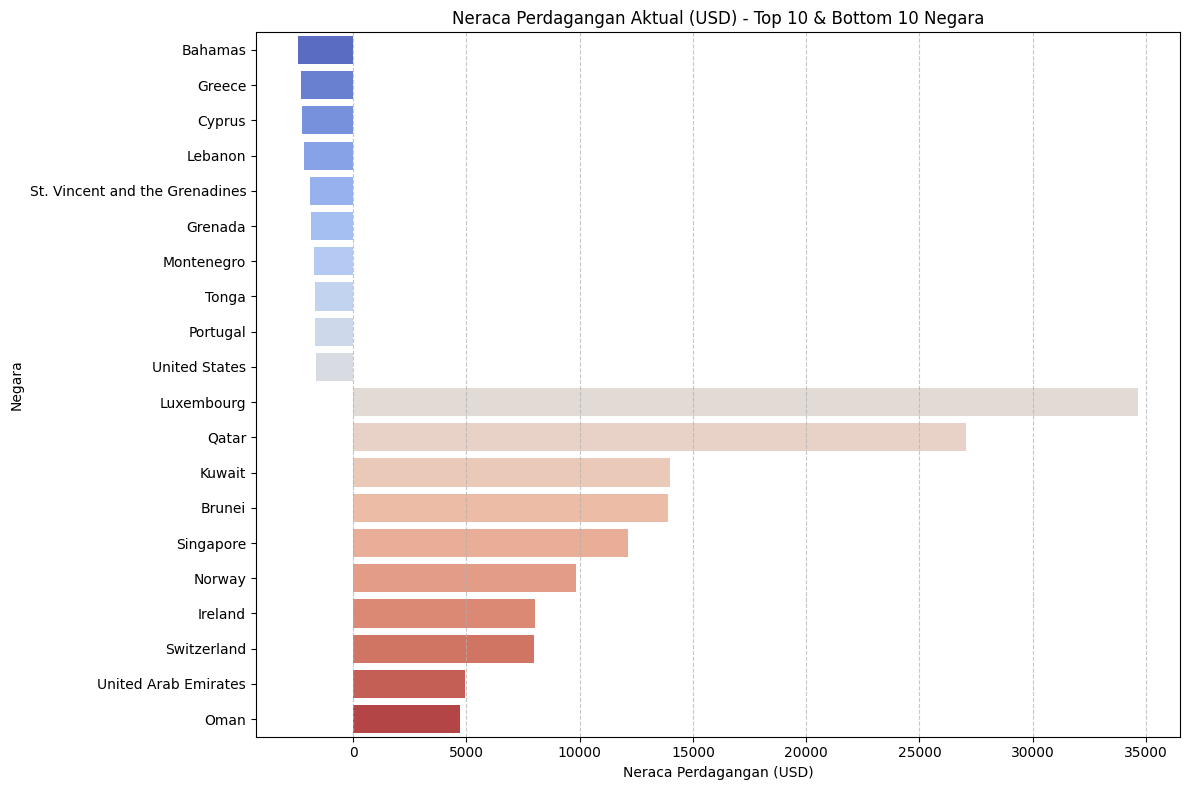

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 and bottom 10 countries by trade_balance
top_10_trade_balance = df_2_2.nlargest(10, 'trade_balance')
bottom_10_trade_balance = df_2_2.nsmallest(10, 'trade_balance')

# Combine for visualization
combined_trade_balance = pd.concat([bottom_10_trade_balance, top_10_trade_balance])

plt.figure(figsize=(12, 8))
sns.barplot(x='trade_balance', y='country', hue='country', data=combined_trade_balance, palette='coolwarm', legend=False)
plt.title('Neraca Perdagangan Aktual (USD) - Top 10 & Bottom 10 Negara')
plt.xlabel('Neraca Perdagangan (USD)')
plt.ylabel('Negara')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Interpretasi:**

Nilai positif menunjukkan adanya surplus perdagangan (ekspor > impor) dan nilai negatif menunjukkan defisit perdagangan (impor > ekspor). Data di atas menampilkan kesenjangan besar neraca perdagangan antarnegara. Negara dengan basis ekspor kuat atau sektor bernilai tambah tinggi cenderung mencatat surplus perdagangan besar, sementara negara yang bergantung pada impor mengalami defisit signifikan. Bahamas merupakan negara dengan defisit perdagangan terbesar, sementara negara dengan surplus perdagangan terbesar ditempati oleh Luxembourg. Skala GDP per kapita memperbesar dampak absolut dari selisih ekspor dan impor.

## Tugas 2.3 (Perbandingan Produksi vs Pendapatan)

Hitung selisih antara nilai produksi negara (GDP) dan pendapatan aktual warga negaranya (Income).

In [ ]:
q2_3 = """
SELECT
  country,
  gdpp,
  income,
  ROUND(gdpp - income, 3) gdp_income_gap
FROM `proyekakhir-dataanalystic.apl_project.country_data`
ORDER BY gdp_income_gap
"""
df_2_3 = client.query(q2_3).to_dataframe()
df_2_3

,country,gdpp,income,gdp_income_gap
0,Qatar,70300,125000,-54700.0
1,Brunei,35300,80600,-45300.0
2,Kuwait,38500,75200,-36700.0
3,Saudi Arabia,19300,45400,-26100.0
4,Oman,19300,45300,-26000.0
...,...,...,...,...
162,Australia,51900,41400,10500.0
163,Luxembourg,105000,91700,13300.0
164,Denmark,58000,44000,14000.0
165,Switzerland,74600,55500,19100.0


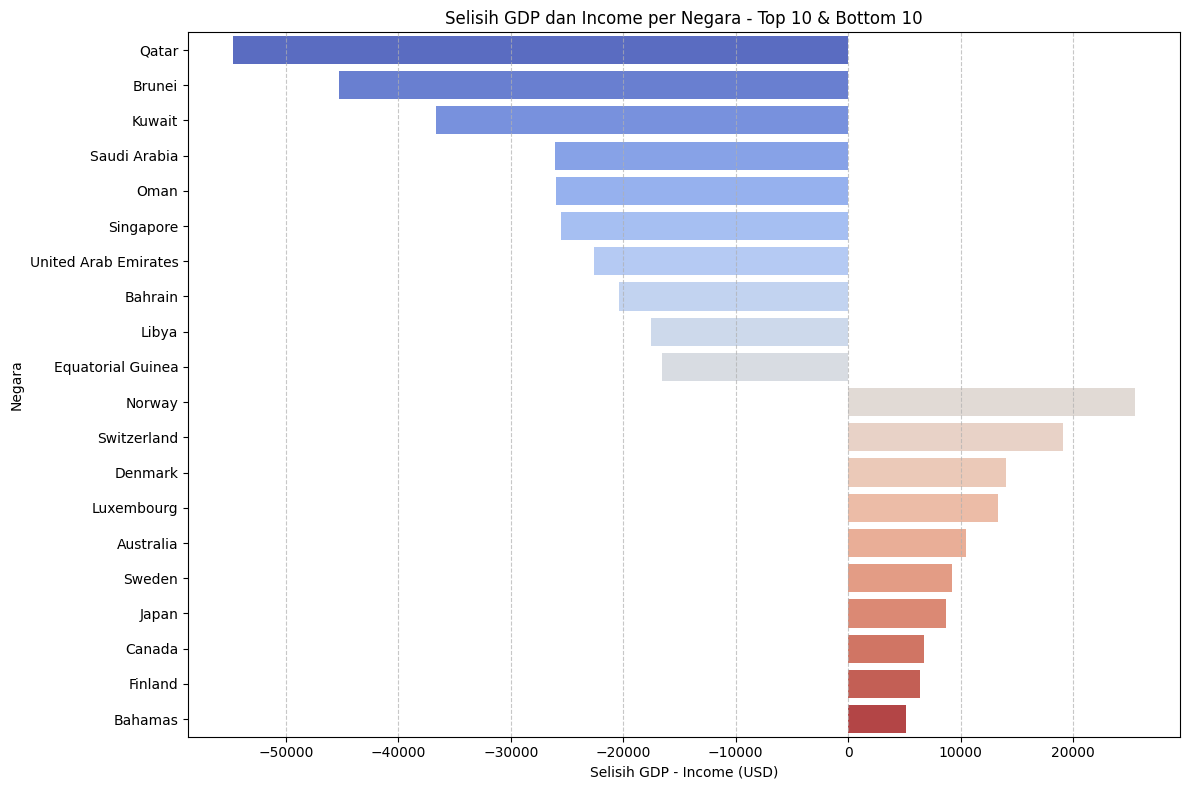

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 and bottom 10 countries by gdp_income_gap
top_10_gdp_income_gap = df_2_3.nlargest(10, 'gdp_income_gap')
bottom_10_gdp_income_gap = df_2_3.nsmallest(10, 'gdp_income_gap')

# Combine for visualization
combined_gdp_income_gap = pd.concat([bottom_10_gdp_income_gap, top_10_gdp_income_gap])

plt.figure(figsize=(12, 8))
sns.barplot(x='gdp_income_gap', y='country', hue='country', data=combined_gdp_income_gap, palette='coolwarm', legend=False)
plt.title('Selisih GDP dan Income per Negara - Top 10 & Bottom 10')
plt.xlabel('Selisih GDP - Income (USD)')
plt.ylabel('Negara')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Interpretasi:**

Nilai positif berarti GDP per kapita lebih besar daripada pendapatan per warga, sementara nilai negatif berarti pendapatan warga lebih besar daripada GDP per kapita. Data menunjukkan bahwa GDP per kapita tidak selalu mencerminkan pendapatan bersih yang diterima warga. Pendapatan warga bisa lebih besar daripada GDP per kapita bisa karena sebagian uang yang diterima masyarakat berasal dari luar negeri, seperti remitansi (kiriman uang dari luar negeri) dan investasi, yang tidak tercatat sebagai produksi domestik. Sebaliknya, GDP per kapita bisa lebih besar daripada pendapatan warga karena sebagian besar nilai produksi ekonomi digunakan untuk pajak, investasi, atau keuntungan perusahaan yang tidak langsung dibagikan kepada masyarakat.

# **Bab 3: Segmentasi Mendalam (Data Grouping)**

## Tugas 3.1 (Segmentasi Tingkat Ekonomi)

Kategorikan negara menjadi Rendah (<$2000), Menengah ($2000 - $10000), dan Tinggi (>$10000) berdasarkan GDP. Hitung rata-rata angka kematian anak untuk setiap kategori.

In [ ]:
q3_1 = """
SELECT
      CASE
            WHEN gdpp <2000 THEN "Rendah"
            WHEN gdpp BETWEEN 2000 AND 10000 THEN "Menengah"
            ELSE "Tinggi"
      END economy_level,
      ROUND(AVG(child_mort), 4) avg_child_mort,
      COUNT(country) total_countries
FROM `proyekakhir-dataanalystic.apl_project.country_data`
GROUP BY economy_level
"""
df_3_1 = client.query(q3_1).to_dataframe()
df_3_1

,economy_level,avg_child_mort,total_countries
0,Rendah,84.0286,49
1,Menengah,28.6934,61
2,Tinggi,9.1825,57


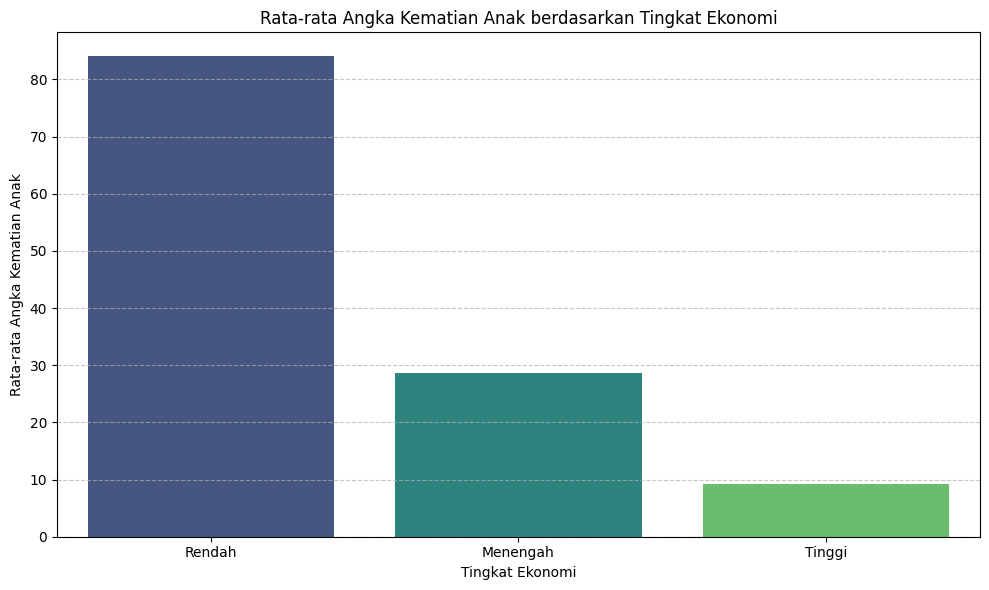

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='economy_level', y='avg_child_mort', data=df_3_1, palette='viridis', hue='economy_level', legend=False)
plt.title('Rata-rata Angka Kematian Anak berdasarkan Tingkat Ekonomi')
plt.xlabel('Tingkat Ekonomi')
plt.ylabel('Rata-rata Angka Kematian Anak')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Interpretasi:**

Terdapat 3 segmentasi tingkat ekonomi negara, yaitu rendah, menengah, dan sedang. Dalam setiap kategorinya memiliki rata-rata angka kematian anak yang berbeda. Kategori rendah berada dalam posisi teratas, yaitu dengan rata-rata 84,03. Lalu diikuti kategori menengah dengan rata-rata 28,69,  dan kategori tinggi dengan rata-rata 9,18.

## Tugas 3.2 (Segmentasi Tingkat Fertilitas)

Kategorikan berdasarkan angka kesuburan: Rendah (<2), Menengah (2-4), dan Tinggi (>4). Hitung rata-rata pendapatan warga untuk kelompok Tinggi.

In [ ]:
q3_2 = """
SELECT
      CASE
            WHEN total_fer <2 THEN "Rendah"
            WHEN total_fer BETWEEN 2 AND 4 THEN "Menengah"
            ELSE "Tinggi"
      END fertility_level,
      ROUND(AVG(income), 4) avg_income,
      COUNT(country) total_countries
FROM `proyekakhir-dataanalystic.apl_project.country_data`
GROUP BY fertility_level
HAVING fertility_level = "Tinggi"
"""
df_3_2 = client.query(q3_2).to_dataframe()
df_3_2

,fertility_level,avg_income,total_countries
0,Tinggi,3532.7561,41


**Interpretasi:**

Ada 41 negara yang termasuk dalam kategori tingkat kesuburan tinggi (>4). Rata-rata pendapatan warga dalam kelompok tinggi adalah 3532.75.

## Tugas 3.3 (Dampak Inflasi terhadap Harapan Hidup)

Kategorikan inflasi menjadi Stabil (<5%), Moderat (5-15%), dan Tinggi (>15%). Hitung rata-rata harapan hidup untuk masing-masing kelompok tersebut.

In [ ]:
q3_3 = """
SELECT
      CASE
            WHEN inflation <5 THEN "Stabil"
            WHEN inflation BETWEEN 5 AND 15 THEN "Moderat"
            ELSE "Tinggi"
      END inflation_level,
      ROUND(AVG(life_expec), 4) avg_life_expec,
      COUNT(country) total_countries
FROM `proyekakhir-dataanalystic.apl_project.country_data`
GROUP BY inflation_level
ORDER BY avg_life_expec DESC
"""
df_3_3 = client.query(q3_3).to_dataframe()
df_3_3

,inflation_level,avg_life_expec,total_countries
0,Stabil,73.3049,82
1,Moderat,68.0193,57
2,Tinggi,67.6679,28


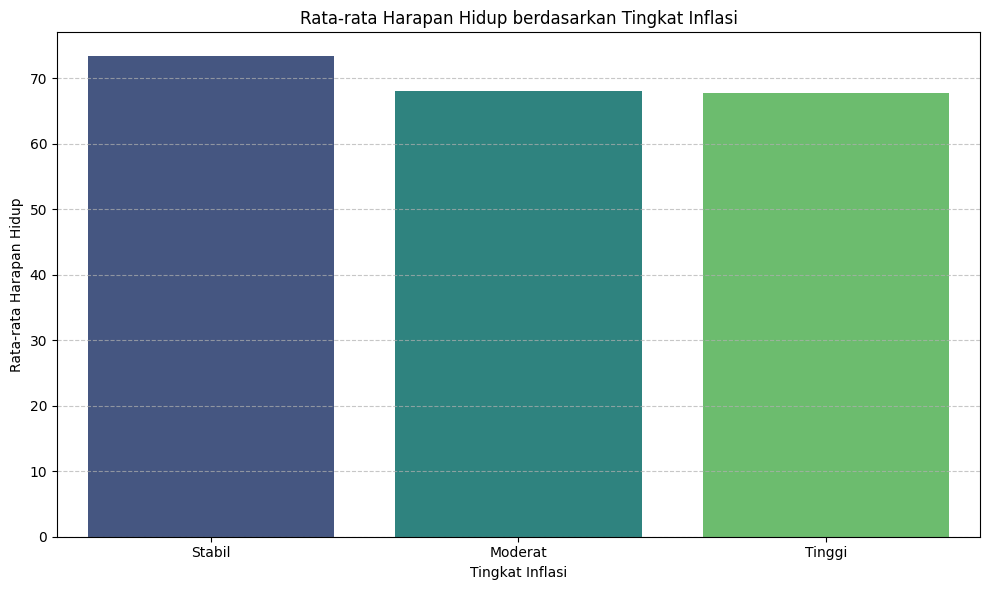

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='inflation_level', y='avg_life_expec', data=df_3_3, palette='viridis', hue='inflation_level', legend=False)
plt.title('Rata-rata Harapan Hidup berdasarkan Tingkat Inflasi')
plt.xlabel('Tingkat Inflasi')
plt.ylabel('Rata-rata Harapan Hidup')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Interpretasi:**

Terdapat 3 kategori tingkat inflasi suatu negara, yaitu stabil, moderat, dan tinggi. Rata-rata harapan hidup masing-masing kelompok berbeda. Kategori stabil berada dalam posisi teratas, yaitu dengan rata-rata 75,3. Kemudian kategori moderat dengan rata-rata 68,02,  dan kategori tinggi dengan rata-rata 67,67.

# **Bab 4: Identifikasi Zona Kritis (Data Filtering)**

## Tugas 4.1 (Menentukan Ambang Batas Statistik)



*   Gunakan SQL untuk mencari nilai Persentil ke-25 dari gdpp (ambang batas kemiskinan).
*   Gunakan SQL untuk mencari nilai Persentil ke-75 dari child_mort (ambang batas krisis kesehatan).



In [ ]:
q4_1 = """
SELECT
  APPROX_QUANTILES(gdpp, 100)[OFFSET(25)] p25_gdpp,
  APPROX_QUANTILES(child_mort, 100)[OFFSET(75)] p75_child_mort
FROM `proyekakhir-dataanalystic.apl_project.country_data`
"""
df_4_1 = client.query(q4_1).to_dataframe()
df_4_1

,p25_gdpp,p75_child_mort
0,1310,62.2


In [ ]:
select
      percentile_cont(gdpp, 0.25) over() ambang_batas_kemiskinan,
      percentile_cont(child_mort, 0.75) over() ambang_batas_krisis_kesehatan
from `atlantean-site-481603-g6.Final_Project.country_data`
limit 1;

**Interpretasi:**

Ambang batas kemiskinan negara adalah 1310 GDP per capita. Sementara ambang batas krisis kesehatan adalah angka kematian anak sebesar 62.2.


## Tugas 4.2 (Filtrasi Negara Prioritas)

Tulis query untuk menemukan negara yang berada di bawah ambang batas GDP (Tugas 4.1) DAN di atas ambang batas kematian anak (Tugas 4.1). Ini adalah daftar negara yang berada di "Zona Merah".

In [ ]:
q4_2 = """
SELECT
  country,
  gdpp,
  child_mort
FROM `proyekakhir-dataanalystic.apl_project.country_data`
WHERE gdpp < 1310
  AND child_mort > 62.2
  AND gdpp IS NOT NULL
  AND child_mort IS NOT NULL
ORDER BY child_mort DESC
"""
df_4_2 = client.query(q4_2).to_dataframe()
df_4_2



,country,gdpp,child_mort
0,Haiti,662,208.0
1,Sierra Leone,399,160.0
2,Chad,897,150.0
3,Central African Republic,446,149.0
4,Mali,708,137.0
5,Niger,348,123.0
6,"Congo, Dem. Rep.",334,116.0
7,Burkina Faso,575,116.0
8,Guinea-Bissau,547,114.0
9,Benin,758,111.0


/tmp/ipython-input-1012923028.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


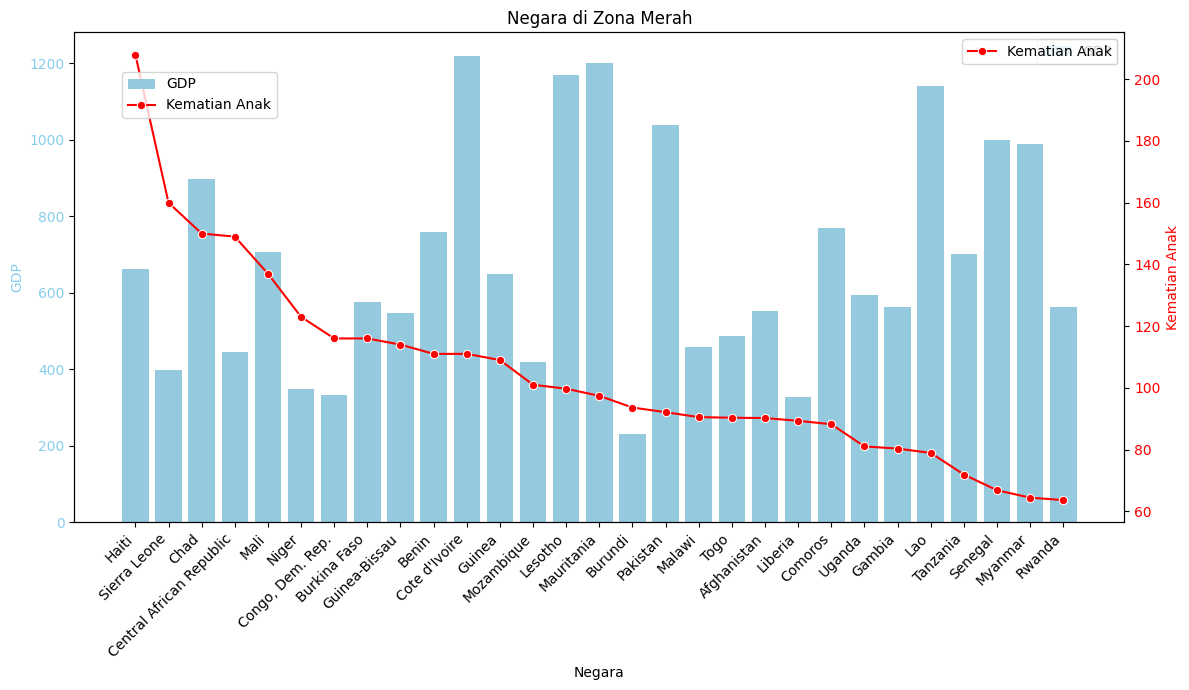

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 7))

# membuat sumbu y kedua
ax2 = ax1.twinx()

# membuat plot gdpp di sumbu y pertama
sns.barplot(x='country', y='gdpp', data=df_4_2, ax=ax1, color='skyblue', label='GDP')
ax1.set_ylabel('GDP', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# membuat plot child-mort di sumbu y kedua
sns.lineplot(x='country', y='child_mort', data=df_4_2, ax=ax2, color='red', marker='o', label='Kematian Anak')
ax2.set_ylabel('Kematian Anak', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# judul dan label
plt.title('Negara di Zona Merah')
ax1.set_xlabel('Negara')

# Add legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()

**Interpretasi:**

Ada 29 negara yang berada di "Zona Merah" alias negara yang berada di bawah ambang batas GDP dan di atas ambang batas kematian. Haiti menempati posisi teratas dengan GDP sebesar 662 dan kematian anak sebesar 208. Lalu diikuti negara Sierra Leone, Chad, Central African Republic, Mali, Niger, Congo, Dem. Rep., Burkina Faso, Guinea-Bissau, Benin, Cote d'lvoire, Guinea, dan terakhir, Rwanda.

# **Bab 5: Keputusan Akhir dan Visualisasi**

## Tugas 5.1 (Pemilihan 10 Negara Prioritas)

Dari daftar negara zona merah pada Bab 4, pilih 10 negara dengan angka harapan hidup terendah secara absolut.

In [ ]:
q5_1 = """
SELECT
  country,
  gdpp,
  child_mort,
  life_expec
FROM `proyekakhir-dataanalystic.apl_project.country_data`
WHERE
  gdpp < (
    SELECT
      APPROX_QUANTILES(gdpp, 100)[OFFSET(25)]
    FROM `proyekakhir-dataanalystic.apl_project.country_data`
  )
  AND
  child_mort > (
    SELECT
      APPROX_QUANTILES(child_mort, 100)[OFFSET(75)]
    FROM `proyekakhir-dataanalystic.apl_project.country_data`
  )
ORDER BY life_expec ASC
LIMIT 10;
"""
df_5_1 = client.query(q5_1).to_dataframe()
df_5_1

,country,gdpp,child_mort,life_expec
0,Haiti,662,208.0,32.1
1,Lesotho,1170,99.7,46.5
2,Central African Republic,446,149.0,47.5
3,Malawi,459,90.5,53.1
4,Mozambique,419,101.0,54.5
5,Sierra Leone,399,160.0,55.0
6,Guinea-Bissau,547,114.0,55.6
7,Afghanistan,553,90.2,56.2
8,Cote d'Ivoire,1220,111.0,56.3
9,Chad,897,150.0,56.5


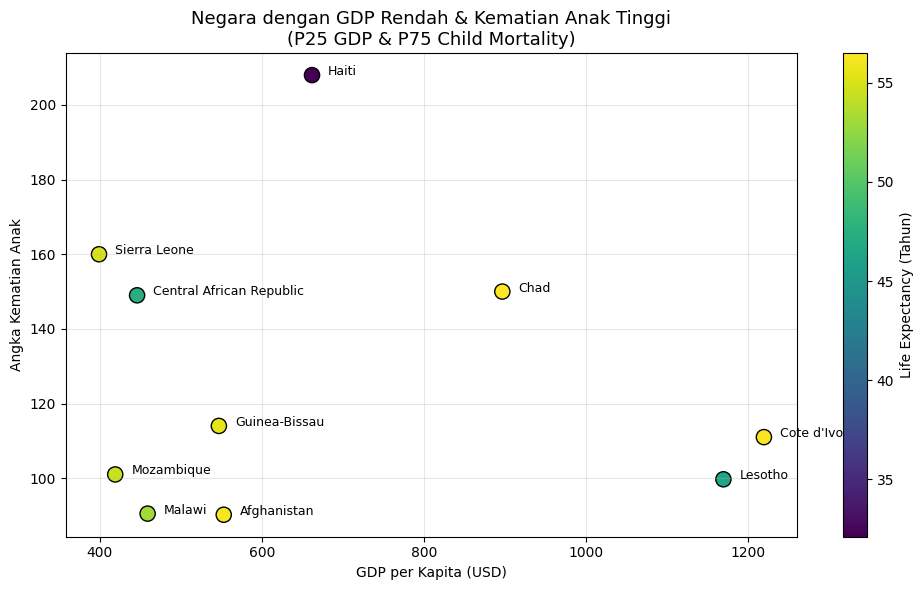

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(
    df_5_1['gdpp'],
    df_5_1['child_mort'],
    c=df_5_1['life_expec'],
    cmap='viridis',
    s=120,
    edgecolor='black'
)

# Label nama negara
for _, row in df_5_1.iterrows():
    plt.text(
        row['gdpp'] + 20,
        row['child_mort'],
        row['country'],
        fontsize=9
    )

# Colorbar
cbar = plt.colorbar()
cbar.set_label('Life Expectancy (Tahun)')

# Judul & label
plt.xlabel('GDP per Kapita (USD)')
plt.ylabel('Angka Kematian Anak')
plt.title(
    'Negara dengan GDP Rendah & Kematian Anak Tinggi\n'
    '(P25 GDP & P75 Child Mortality)',
    fontsize=13
)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Interpretasi:**

Berdasarkan 29 negara yang sebelumnya teridentifikasi berada dalam Zona Merah (GDP per kapita di bawah persentil ke-25 dan angka kematian anak di atas persentil ke-75), dipilih 10 negara dengan harapan hidup terendah secara absolut.

Grafik scatter menunjukkan bahwa negara-negara tersebut terkonsentrasi pada GDP per kapita yang sangat rendah disertai angka kematian anak yang tinggi. Selain itu, gradasi warna pada grafik memperlihatkan bahwa negara dengan tingkat kematian anak yang lebih tinggi cenderung memiliki harapan hidup yang lebih rendah, menegaskan adanya hubungan erat antara krisis kesehatan dan rendahnya kualitas hidup penduduk.

## Tugas 5.2 (Visualisasi Sebaran Data)

Gunakan Python (Seaborn/Matplotlib) untuk membuat scatter plot antara GDP dan Kematian Anak. Berikan penanda warna khusus pada 10 negara pilihan Anda.

In [ ]:
query = """
SELECT *
FROM `proyekakhir-dataanalystic.apl_project.country_data`
"""

df = client.query(query).to_dataframe()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    Int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    Int64  
dtypes: Int64(2), float64(7), object(1)
memory usage: 13.5+ KB


In [ ]:
# ringkasan dataset
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
1,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170
2,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
3,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460
4,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459


In [ ]:
# Ambang batas GDP (Persentil 25)
gdp_threshold = df['gdpp'].quantile(0.25)

# Ambang batas kematian anak (Persentil 75)
child_mort_threshold = df['child_mort'].quantile(0.75)

gdp_threshold, child_mort_threshold

(np.float64(1330.0), np.float64(62.1))

In [ ]:
zona_merah = df[
    (df['gdpp'] < gdp_threshold) &
    (df['child_mort'] > child_mort_threshold)
]

zona_merah.shape

(33, 10)

In [ ]:
top10_negara = zona_merah.sort_values(
    by='life_expec',
    ascending=True
).head(10)

top10_negara[['country', 'gdpp', 'child_mort', 'life_expec']]


,country,gdpp,child_mort,life_expec
66,Haiti,662,208.0,32.1
87,Lesotho,1170,99.7,46.5
31,Central African Republic,446,149.0,47.5
94,Malawi,459,90.5,53.1
106,Mozambique,419,101.0,54.5
132,Sierra Leone,399,160.0,55.0
64,Guinea-Bissau,547,114.0,55.6
0,Afghanistan,553,90.2,56.2
40,Cote d'Ivoire,1220,111.0,56.3
32,Chad,897,150.0,56.5


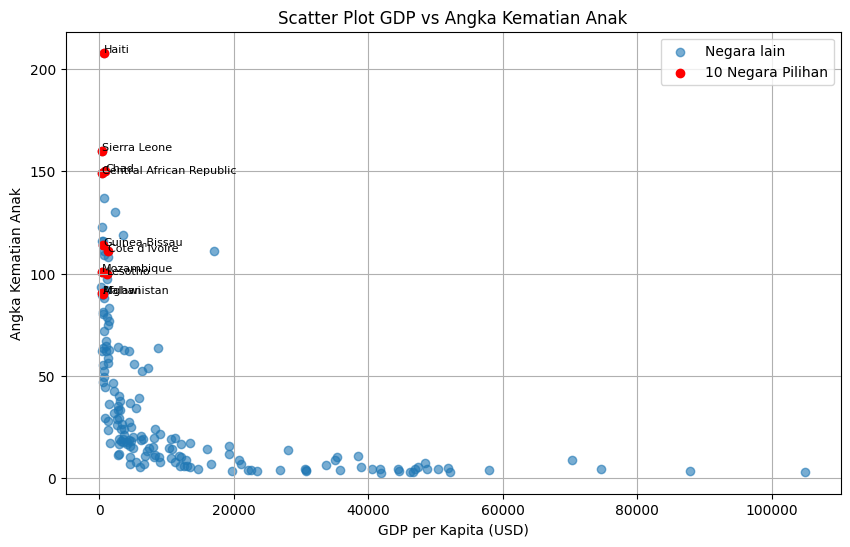

In [ ]:
plt.figure(figsize=(10,6))

# Semua negara
plt.scatter(
    df['gdpp'],
    df['child_mort'],
    alpha=0.6,
    label='Negara lain'
)

# 10 negara pilihan
plt.scatter(
    top10_negara['gdpp'],
    top10_negara['child_mort'],
    color='red',
    label='10 Negara Pilihan'
)

# Menambahkan label nama negara
for _, row in top10_negara.iterrows():
    plt.text(
        row['gdpp'],
        row['child_mort'],
        row['country'],
        fontsize=8
    )

plt.xlabel('GDP per Kapita (USD)')
plt.ylabel('Angka Kematian Anak')
plt.title('Scatter Plot GDP vs Angka Kematian Anak')
plt.legend()
plt.grid(True)
plt.show()


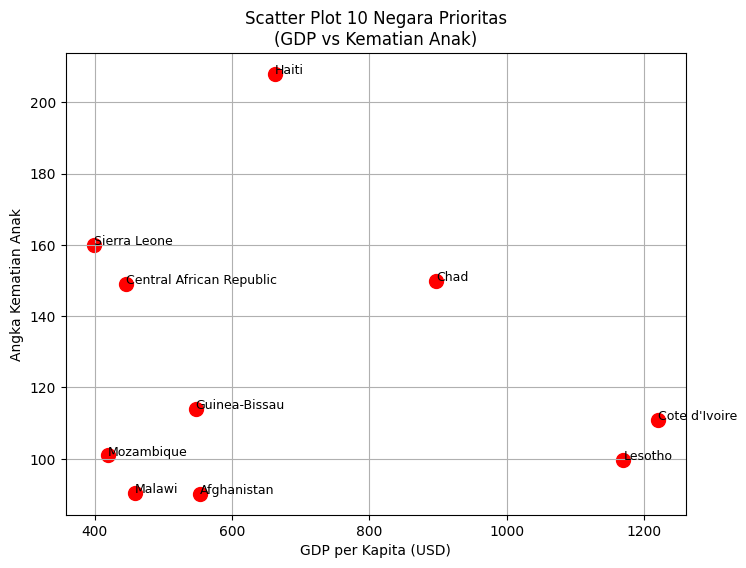

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(
    top10_negara['gdpp'],
    top10_negara['child_mort'],
    color='red',
    s=100
)

for _, row in top10_negara.iterrows():
    plt.text(
        row['gdpp'],
        row['child_mort'],
        row['country'],
        fontsize=9
    )

plt.xlabel('GDP per Kapita (USD)')
plt.ylabel('Angka Kematian Anak')
plt.title('Scatter Plot 10 Negara Prioritas\n(GDP vs Kematian Anak)')
plt.grid(True)
plt.show()

**Interpretasi:**

Scatter plot menunjukkan hubungan negatif yang kuat antara GDP per kapita dan angka kematian anak. Sepuluh negara yang ditandai warna merah merupakan negara zona merah yang memiliki GDP rendah, tingkat kematian anak tinggi, serta angka harapan hidup terendah secara absolut. Kondisi ini menunjukkan tingkat kerentanan sosial-ekonomi dan kesehatan yang tinggi, sehingga negara-negara tersebut layak menjadi prioritas utama dalam pemberian bantuan dan intervensi kebijakan kesehatan.

# **Saran Alokasi Dana**

In [ ]:
qadana = """
select country, health, child_mort, gdpp, round(((health/100)* gdpp),2) health_spending,exports, imports, round(((exports-imports)*(gdpp/100)),2) trade_balance, income, round((gdpp-income),2)wealth_gap,
life_expec,
from `proyekakhir-dataanalystic.apl_project.country_data`
where
      gdpp<= 1310
      and child_mort>62.1
order by life_expec asc
limit 10;
"""
df_adana = client.query(qadana).to_dataframe()
df_adana

,country,health,child_mort,gdpp,health_spending,exports,imports,trade_balance,income,wealth_gap,life_expec
0,Haiti,6.91,208.0,662,45.74,15.3,64.7,-327.03,1500,-838.0,32.1
1,Lesotho,11.10,99.7,1170,129.87,39.4,101.0,-720.72,2380,-1210.0,46.5
2,Central African Republic,3.98,149.0,446,17.75,11.8,26.5,-65.56,888,-442.0,47.5
3,Malawi,6.59,90.5,459,30.25,22.8,34.9,-55.54,1030,-571.0,53.1
4,Mozambique,5.21,101.0,419,21.83,31.5,46.2,-61.59,918,-499.0,54.5
5,Sierra Leone,13.10,160.0,399,52.27,16.8,34.5,-70.62,1220,-821.0,55.0
6,Guinea-Bissau,8.50,114.0,547,46.50,14.9,35.2,-111.04,1390,-843.0,55.6
7,Afghanistan,7.58,90.2,553,41.92,10.0,44.9,-193.00,1610,-1057.0,56.2
8,Cote d'Ivoire,5.30,111.0,1220,64.66,50.6,43.3,89.06,2690,-1470.0,56.3
9,Chad,4.53,150.0,897,40.63,36.8,43.5,-60.10,1930,-1033.0,56.5


#